### A brief tutorial on how to pull and display galaxy cutouts from the Legacy Survey website...

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import os
from astropy.table import Table
from astropy.wcs import WCS

from astropy.io import fits
from astropy.table import Table
from astropy.io import ascii

In [40]:
import requests
import shutil

In [2]:
homedir = os.getenv("HOME")

vfmain = Table.read(homedir+'/sample_main.fits')
vfz0mgs = Table.read(homedir+'/sample_mgs.fits')

In [98]:
ra = vfmain['RA'][0]
dec = vfmain['DEC'][0]
size = vfmain['radius'][0]
galname = vfmain['prefix'][0]

wise image size =  348
downloading unwise images
http://unwise.me/cutout_fits?version=allwise&ra=237.85522&dec=62.31004&size=348&bands=3
['unwise-2368p620-w3-img-m.fits', 'unwise-2368p620-w3-invvar-m.fits.gz', 'unwise-2368p620-w3-n-m.fits.gz', 'unwise-2368p620-w3-std-m.fits.gz']
(348, 348)
self.psfimage =  /Users/k215c316/github/virgowise/wise_psfs/wise-w3-psf-wpro-09x09-05x05.fits
sersic n, fitsersicn =  2 1
BA, fitBA =  1 1
run the following:  galfit VFID0388-NGC6015-unwise-w3-galfit.input.1Comp
  1_XC : 175.31 +/-  0.01
  1_YC : 174.87 +/-  0.02
 1_MAG :  4.85 +/-  0.00
  1_RE : 17.24 +/-  0.02
   1_N :  0.38 +/-  0.00
  1_AR :  0.47 +/-  0.00
  1_PA : 30.70 +/-  0.07
 2_SKY : -5.07 +/-  0.94
 ERROR :  0.00
CHI2NU :  3.45
VFID0388-NGC6015


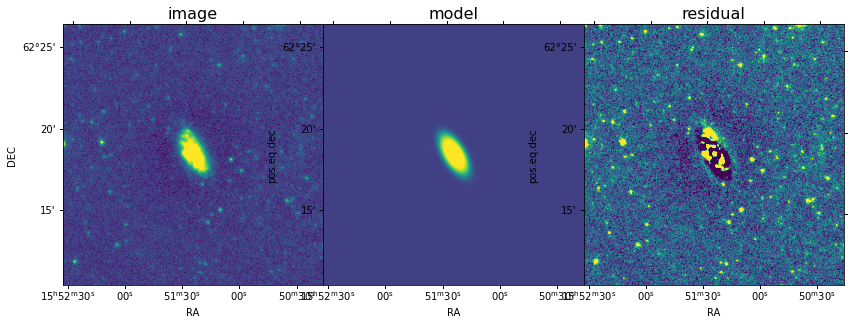

In [69]:
os.chdir(homedir+'/github/WISE_test')
%run ~/github/virgowise/wisesize.py
g = galaxy(ra, dec, size,name=galname,band='3')
g.run_simple(convflag=False)

One option (a bit clunkier, actually downloads a file).

In [68]:
image_url = "https://www.legacysurvey.org/viewer/cutout.jpg?ra=135.3660&dec=3.7204&layer=ls-dr8&pixscale=1.00"
filename = "test.fits"

r = requests.get(image_url, stream = True)

if r.status_code == 200:
    r.raw.decode_content=True
    with open(filename,'wb') as f:
        shutil.copyfileobj(r.raw,f)
    print('Successful',filename)
else:
    print('no')



Successful test.fits


Second option utilizes wget and a matplotlib package; only displays image in notebook, which is essentially the aim here.

I will use a test galaxy, which is the first that the Legacy Survey Viewer opened when loaded in my browser tab. Unfortunately (see below), not all galaxies are quite as pristine or well-centered.

Note: the axes, I assume, represent pixel counts.

In [65]:
image = wget.download(image_url)

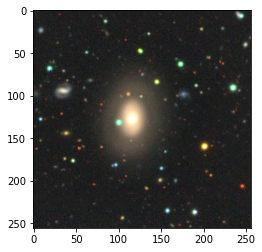

In [67]:
import matplotlib.image as mpimg

plt.figure()
plt.imshow(mpimg.imread(image))
plt.show()

This next galaxy is that featured in the above mosaic. No, the magenta streak is not representative of the actual physical object.

In [71]:
print(ra,dec)

237.85522 62.310036


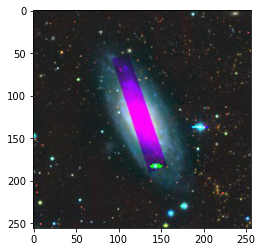

In [99]:
image_url = "https://www.legacysurvey.org/viewer/cutout.jpg?ra="+str(ra)+"&dec="+str(dec)+"&layer=ls-dr8&pixscale=2.00"

image = wget.download(image_url)

plt.figure()
plt.imshow(mpimg.imread(image))
plt.show()

VFID0484-NGC3945


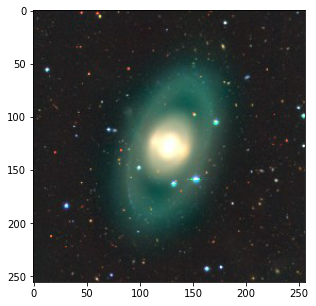

VFID0525-NGC5322


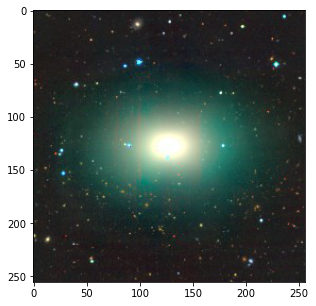

In [96]:
image_url = "https://www.legacysurvey.org/viewer/cutout.jpg?ra="+str(vfmain['RA'][1])+"&dec="+str(vfmain['DEC'][1])+"&layer=ls-dr8&pixscale=2.00"
image_url_2 = "https://www.legacysurvey.org/viewer/cutout.jpg?ra="+str(vfmain['RA'][2])+"&dec="+str(vfmain['DEC'][2])+"&layer=ls-dr8&pixscale=2.00"

image = wget.download(image_url)
image2 = wget.download(image_url_2)

print(vfmain['prefix'][1])
plt.figure(figsize=(5,5))
plt.imshow(mpimg.imread(image))
plt.show()

print(vfmain['prefix'][2])
plt.figure(figsize=(5,5))
plt.imshow(mpimg.imread(image2))
plt.show()


Combining the two,

wise image size =  338
downloading unwise images
http://unwise.me/cutout_fits?version=allwise&ra=137.90605&dec=60.03732&size=338&bands=3
['unwise-1380p605-w3-img-m.fits', 'unwise-1380p605-w3-invvar-m.fits.gz', 'unwise-1380p605-w3-n-m.fits.gz', 'unwise-1380p605-w3-std-m.fits.gz']
(338, 338)
self.psfimage =  /Users/k215c316/github/virgowise/wise_psfs/wise-w3-psf-wpro-09x09-05x05.fits
sersic n, fitsersicn =  2 1
BA, fitBA =  1 1
run the following:  galfit VFID0547-NGC2768-unwise-w3-galfit.input.1Comp
  1_XC : 170.58 +/-  0.02
  1_YC : 170.45 +/-  0.01
 1_MAG :  6.55 +/-  0.01
  1_RE :  9.97 +/-  0.19
   1_N :  2.02 +/-  0.03
  1_AR :  0.76 +/-  0.01
  1_PA : -87.40 +/-  1.08
 2_SKY : -17.29 +/-  1.28
 ERROR :  0.00
CHI2NU :  1.41
VFID0547-NGC2768


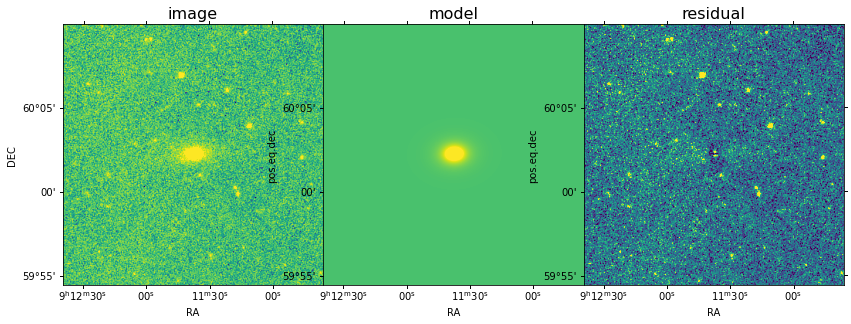

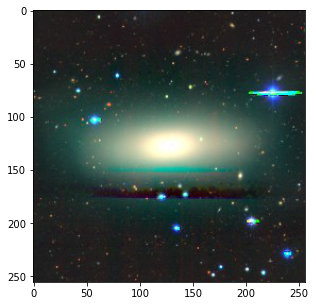

In [94]:
ra = vfmain['RA'][3]
dec = vfmain['DEC'][3]
size = vfmain['radius'][3]
galname = vfmain['prefix'][3]


g = galaxy(ra, dec, size,name=galname,band='3')
g.run_simple(convflag=False)

# Note for later reference --> I may like to use run_simple instead of run_all for my GALFIT loop, as doing
# so allows me to both print the galaxy prefix and display the SDSS or DR8 cutout immediately underneath
# the mosaic.

image_url_3 = "https://www.legacysurvey.org/viewer/cutout.jpg?ra="+str(ra)+"&dec="+str(dec)+"&layer=ls-dr8&pixscale=2.00"

image3 = wget.download(image_url_3)

print(vfmain['prefix'][3])
plt.figure(figsize=(5,5))
plt.imshow(mpimg.imread(image3))
plt.show()

#### The Legacy Survey cutout is ... a bit streaky. The problem *might* be the link, so I will try SDSS instead of DR8.

VFID0547-NGC2768


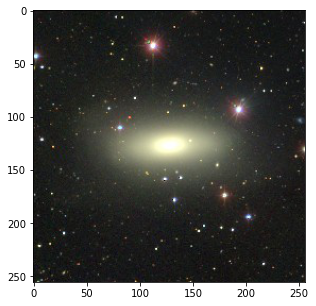

In [101]:
image_url = "https://www.legacysurvey.org/viewer/cutout.jpg?ra=137.9066&dec=60.0367&layer=sdss&pixscale=3.00"

image = wget.download(image_url)

print(vfmain['prefix'][3])
plt.figure(figsize=(5,5))
plt.imshow(mpimg.imread(image))
plt.show()

One trouble I encountered was the galaxy scale: the final url argument, pixscale, might require a bit of manipulation as I transition to the less massive galaxies (indeed, the first galaxy I displayed used a scale of 1.00, which was fine for that sized galaxy but REALLY magnified these larger behemoths...I show an example below on NGC-2768).

VFID0547-NGC2768


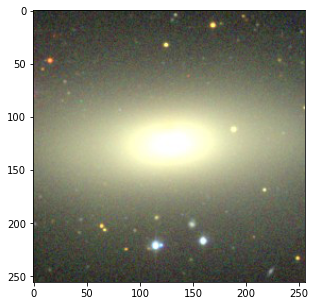

In [100]:
image_url = "https://www.legacysurvey.org/viewer/cutout.jpg?ra=137.9066&dec=60.0367&layer=sdss&pixscale=1.00"

image = wget.download(image_url)

print(vfmain['prefix'][3])
plt.figure(figsize=(5,5))
plt.imshow(mpimg.imread(image))
plt.show()